<a href="https://colab.research.google.com/github/aashu-0/deep-learning/blob/main/chap_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import fastai

In [2]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x):
  return x[0].isupper()
dls = ImageDataLoaders.from_name_func(path, get_image_files(path),
                                      valid_pct=0.2,  # by default 0.2
                                      seed = 42,
                                      label_func=is_cat,
                                      item_tfms= Resize(224))

learn = vision_learner(dls, resnet34, metrics= error_rate)

# vision learner => to create a CNN
# resnet34 => architecture to use
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 123MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.165998,0.024109,0.009472,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.056809,0.020993,0.004736,00:49


In [3]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.0 MB/s eta 0:00:00


In [4]:
from ipywidgets import *
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [5]:
img = PILImage.create(uploader.data[0])
is_cat,_, probs = learn.predict(img)
print(f'Is this a cat: {is_cat}')
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat: True
Probability it's a cat: 1.000000


In [8]:
# segmentation model
# untar_data => helper func to download fastai datasets
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8,
    fnames=get_image_files(path/'images'),
    label_func= lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.024094,2.251431,00:01


epoch,train_loss,valid_loss,time
0,1.856628,1.618942,00:01
1,1.594664,1.304843,00:01
2,1.443241,1.200086,00:01
3,1.339087,1.000658,00:01
4,1.216446,0.885243,00:01
5,1.103856,0.832098,00:01
6,1.011321,0.801884,00:01
7,0.938864,0.797687,00:01


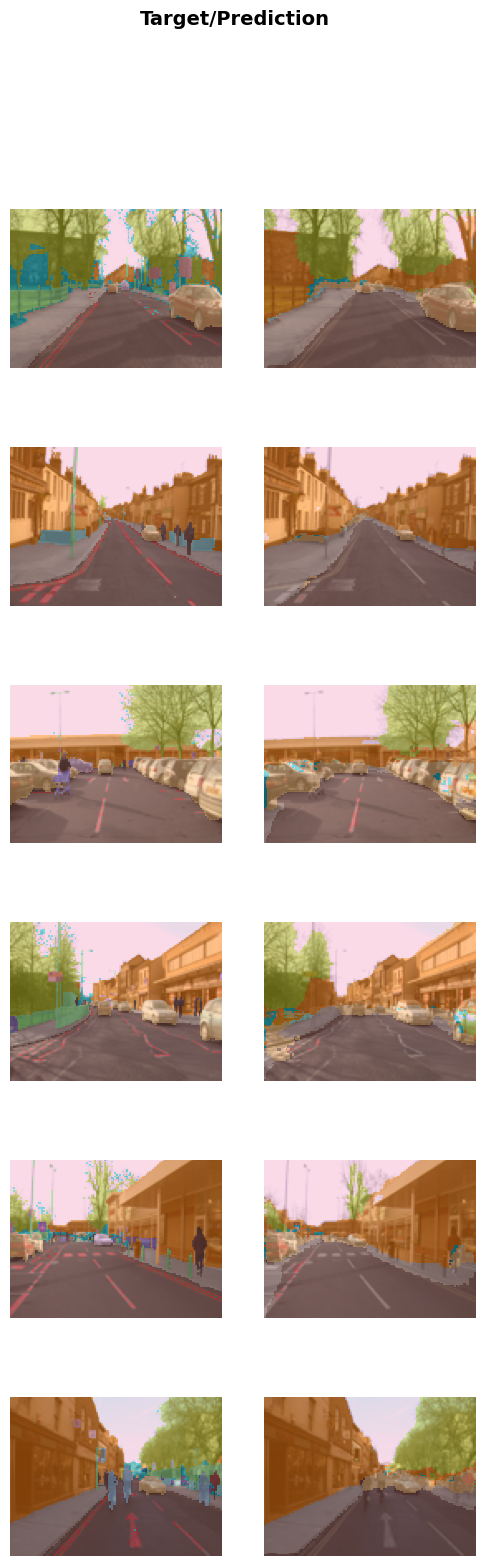

In [14]:
learn.show_results(max_n=6)

In [15]:
# model03
# classifying the sentiment of movie review

from fastai.text.all import *

In [16]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')

learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics = accuracy)
learn.fine_tune(4, 1e-2)    # 1e-2 -> learning rate

/usr/local/lib/python3.10/dist-packages/fastai/text/learner.py:149: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  wgts = torch.load(wgts_fname, map_location = lambda storage

epoch,train_loss,valid_loss,accuracy,time
0,0.461802,0.405344,0.818000,03:09


epoch,train_loss,valid_loss,accuracy,time
0,0.303710,0.240201,0.903840,06:37
1,0.248211,0.201129,0.921880,06:36
2,0.181159,0.189239,0.928240,06:42
3,0.138127,0.196985,0.928040,06:42


In [17]:
learn.predict("There is nothing brash, or heavy handed about it, the story is superbly told, with well grounded characters. The story is of course sci fi, and hugely creative, but it's never silly, it is incredibly intelligent. Awesome special effects, I loved the design of the alien race, and their language, quite incredible.")

('pos', tensor(1), tensor([0.0044, 0.9956]))

In [18]:
learn.predict('More curious and thought provoking than the movie, is the fact the anyone liked this waste of celluloid.')

('neg', tensor(0), tensor([0.9469, 0.0531]))

In [20]:
learn.predict("The story would be interesting if it were not botched completely with unbelievable situations and silly action sequences. The direction is entirely unremarkable, and the special effects are wholly un-amazing. Plus, it's got a kid in it - a sure flaw in any film for adults. Truly terrible.")

('neg', tensor(0), tensor([0.9966, 0.0034]))

In [21]:
learn.predict("IT was kind of a strange movie, that I didn't really care for. I didn't dislike it that much either. I really didn't have an opinion on it. The whole concept was kind of different which was a plus. And it had a couple of plot twists that weren't that bad, but I didn't really care for it.")

('neg', tensor(0), tensor([0.8968, 0.1032]))

In [26]:
learn.predict("I don't liked the movie much")

('neg', tensor(0), tensor([0.6468, 0.3532]))

In [27]:
learn.predict("I do liked the movie much :)")

('pos', tensor(1), tensor([0.0141, 0.9859]))

In [28]:
# model04
# tabular data

from fastai.tabular.all import *

In [29]:
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(
    path/'adult.csv', path = path,
    y_names='salary',
    cat_names = ['workclass', 'education','marital-status', 'occupation',
                 'relationship','race'],      # categorical values
    cont_names = ['age', 'fnlwgt', 'education-num'],   # continuous values
    procs = [Categorify, FillMissing, Normalize]
    )

learn = tabular_learner(dls, metrics = accuracy)

/usr/local/lib/python3.10/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


In [30]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.384786,0.364895,0.831695,00:06
1,0.370135,0.344976,0.844134,00:05
2,0.368876,0.344210,0.845055,00:04


In [31]:
# model05
# recommendation systems

from fastai.collab import *

In [34]:
path = untar_data(URLs.ML_SAMPLE)

dls = CollabDataLoaders.from_csv(path/'ratings.csv')

learn = collab_learner(dls, y_range = (0.5, 5.5))

learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.512714,1.434753,00:00


epoch,train_loss,valid_loss,time
0,1.404516,1.377545,00:00
1,1.299295,1.208838,00:00
2,1.050372,0.909300,00:00
3,0.818238,0.742327,00:00
4,0.684934,0.697736,00:00
5,0.644488,0.680768,00:00
6,0.630018,0.677199,00:00
7,0.617913,0.674920,00:00
8,0.611326,0.673603,00:00
9,0.601228,0.673514,00:00


In [35]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,66.0,49.0,4.0,4.148007
1,10.0,92.0,5.0,4.296379
2,28.0,3.0,1.5,3.066472
3,57.0,83.0,4.5,3.709735
4,33.0,14.0,5.0,4.151757
5,66.0,93.0,5.0,4.308176
6,33.0,96.0,4.0,3.803392
7,11.0,16.0,3.5,3.794332
8,33.0,96.0,4.0,3.803392
